In [47]:
import pandas as pd
import numpy as np

In [48]:
#Reading in data

dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [49]:
#preliminary glimpse at data sets

print(dete_survey.info)
dete_survey.head()

<bound method DataFrame.info of       ID                        SeparationType Cease Date  DETE Start Date  \
0      1                 Ill Health Retirement    08/2012           1984.0   
1      2      Voluntary Early Retirement (VER)    08/2012              NaN   
2      3      Voluntary Early Retirement (VER)    05/2012           2011.0   
3      4             Resignation-Other reasons    05/2012           2005.0   
4      5                        Age Retirement    05/2012           1970.0   
..   ...                                   ...        ...              ...   
817  819                        Age Retirement    02/2014           1977.0   
818  820                        Age Retirement    01/2014           1980.0   
819  821  Resignation-Move overseas/interstate    01/2014           2009.0   
820  822                 Ill Health Retirement    12/2013           2001.0   
821  823  Resignation-Move overseas/interstate    12/2013              NaN   

     Role Start Date           

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [50]:
# Exploring number of null values

dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [51]:
#Preliminary look at some a few of the rows to get insight into
#factors that may be linked to retention: Job Type, Separation Type,
#Age.

dete_survey['Position'].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
Deputy Principal                                             4
Business Service Manager                                     4
Name: Position, dtype: int64

In [52]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [53]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

## Observations about Dete_survey

Lots of quitting in the education / public servant professions.

Fair number of age-related retirements. I would be most interested in looking at the rows wheredete_survey ['SeparationType'] == 'Resignation-Other reasons' and Resignation-Other employer

For ages, as we'd expect, we see more people leaving closer to retirement age. I'd be interested in looking at observations where especially at observations in the late 20s. Some suggestions that people are shifting away from their profession after logging a few years out of college.

In [54]:
# looking at the tafe_survey

print(tafe_survey.info)
tafe_survey.head()

<bound method DataFrame.info of         Record ID                              Institute  \
0    6.341330e+17  Southern Queensland Institute of TAFE   
1    6.341337e+17            Mount Isa Institute of TAFE   
2    6.341388e+17            Mount Isa Institute of TAFE   
3    6.341399e+17            Mount Isa Institute of TAFE   
4    6.341466e+17  Southern Queensland Institute of TAFE   
..            ...                                    ...   
697  6.350668e+17         Barrier Reef Institute of TAFE   
698  6.350677e+17  Southern Queensland Institute of TAFE   
699  6.350704e+17       Tropical North Institute of TAFE   
700  6.350712e+17      Southbank Institute of Technology   
701  6.350730e+17       Tropical North Institute of TAFE   

                     WorkArea  CESSATION YEAR Reason for ceasing employment  \
0    Non-Delivery (corporate)          2010.0              Contract Expired   
1    Non-Delivery (corporate)          2010.0                    Retirement   
2         

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [55]:
# looking at null values
# note that many NA values are coded as '-' in the dataset.

print("Length of Dataset: ", len(tafe_survey))
print("Length of Dataset without NAs: ",len(tafe_survey.dropna()))

tafe_survey.head()


Length of Dataset:  702
Length of Dataset without NAs:  56


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [56]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [57]:
column_names = ['Institute', 'WorkArea', 'Reason for ceasing employment', 
                'Main Factor. Which of these was the main factor for leaving?']

for column in column_names:
    print(tafe_survey[column].value_counts())

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64
Dissatisfaction with %[Institute]Q25LBL%    23
Job Dissatisfaction                         22
O

In [58]:
for column in tafe_survey:
    print("Number of nulls in ", column, ":", tafe_survey[column].isnull().sum())

Number of nulls in  Record ID : 0
Number of nulls in  Institute : 0
Number of nulls in  WorkArea : 0
Number of nulls in  CESSATION YEAR : 7
Number of nulls in  Reason for ceasing employment : 1
Number of nulls in  Contributing Factors. Career Move - Public Sector  : 265
Number of nulls in  Contributing Factors. Career Move - Private Sector  : 265
Number of nulls in  Contributing Factors. Career Move - Self-employment : 265
Number of nulls in  Contributing Factors. Ill Health : 265
Number of nulls in  Contributing Factors. Maternity/Family : 265
Number of nulls in  Contributing Factors. Dissatisfaction : 265
Number of nulls in  Contributing Factors. Job Dissatisfaction : 265
Number of nulls in  Contributing Factors. Interpersonal Conflict : 265
Number of nulls in  Contributing Factors. Study : 265
Number of nulls in  Contributing Factors. Travel : 265
Number of nulls in  Contributing Factors. Other : 265
Number of nulls in  Contributing Factors. NONE : 265
Number of nulls in  Main Facto

## Observations on tafe_survey

Much more granular look offered in the tafe_survey, but many more null values. More complicated from a cleaning perspective. And holy hell these column names.

Frustratingly, the 'Main Factor' has way too many nulls to provide much insight into the main reason for why people leave.


## Cleaning the Data

In [59]:
dete_survey_updated = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
dete_survey_updated.drop(dete_survey_updated.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

I've reread in the datasets, better accounting for NA values in the dete_survey and removing unnecessary columns in both datasets.

### Updating Column Names

Below I simplify some of the names of the columns in both survety datasets.

In [60]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

In [61]:
tafe_survey_updated = tafe_survey_updated.rename(columns={"Record ID":"id",
                                                "CESSATION YEAR":"cease_date",
                                                'Reason for ceasing employment': 'separationtype',
                                                "Gender.What is your Gender?":"gender",
                                                'CurrentAge. Current Age': 'age',
                                                'Employment Type. Employment Type': 'employment_status',
                                                'Classification. Classification': 'position',
                                                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
                                                          
                                                          

In [62]:
print(tafe_survey_updated.head())
print(dete_survey_updated.head())


             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4   

### Looking at Unique Resignations

In [63]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [64]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

### Subsetting Datasets to Look Only at Resignations

In [65]:
resignation_types = ['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(resignation_types)]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']



In [66]:
print(dete_resignations.head(10))
tafe_resignations.head(10)

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   
12  13             Resignation-Other reasons       2012           1998.0   
14  15            Resignation-Other employer       2012           2007.0   
16  17             Resignation-Other reasons       2012              NaN   
20  21            Resignation-Other employer       2012           1982.0   
21  22             Resignation-Other reasons       2012           1980.0   

    role_start_date          position classification  \
3            2006.0           Teacher        Primary   
5            1997.0  Guidance Officer            Na

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


## Checking for Data Inconsistencies

In [67]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [68]:
#Extracting Four-Digit Year (with Regular Expression)

year = r"(?P<Year>[1-2][0-9]{3})"

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
print(dete_resignations['cease_date'])



3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64


<ipython-input-68-d24086e19ce9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year)
<ipython-input-68-d24086e19ce9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")


In [69]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [70]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [71]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

I'm seeing nothing in the start/cease dates that gives me cause for concern. As expected, there are a small handful of older start dates (prior to 1980), but nothing so old as to be implausible. 

It seems maybe a little odd that the DETE survey data includes resignatiojns from 2014 but TAFE does not. I'm not sure if the dataset is supposed to end in 2013 or not, but I'm assuming the TAFE data just doesn't run through 2014 and that the 2014 DETE data is not erroneous.

## Service Years

Engineering a feature that shows length of service. This will allow us to have the data to determine if these two institutes have a disproportionate amount of people leaving after a short time of service.

In [72]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

<ipython-input-72-2cdf866b3922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

## Dissatisfied Feature

Creating a feature to simplify the expression of dissatisfaction in the resignation datasets.

In [73]:
# Looking at the pertinent initial values in the tafe survey data

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [74]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [75]:
# Updating the values in the above columns to be T, F, or NA.

def update_values(value):
    if pd.isnull(value) == True:
        return np.nan
    elif value == '-':
        return False
    else:
        return True
    
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_values)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_values)
tafe_survey_updated['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_values)
tafe_survey_updated['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_values)



<ipython-input-75-19a01b631ea5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_values)
<ipython-input-75-19a01b631ea5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_values)


In [76]:
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [77]:
#Creating the Dissatisfied column

tafe_cols_diss = tafe_survey_updated[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]
dete_cols_diss = dete_survey_updated[['job_dissatisfaction',
                  'dissatisfaction_with_the_department',
                  'physical_work_environment',
                  'lack_of_recognition',
                  'lack_of_job_security',
                  'work_location',
                  'employment_conditions',
                  'work_life_balance',
                  'workload']]


dete_resignations['dissatisfied'] = dete_cols_diss.any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
tafe_resignations['dissatisfied'] = tafe_cols_diss.any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()



<ipython-input-77-576322ded284>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['dissatisfied'] = dete_cols_diss.any(axis=1, skipna=False)
<ipython-input-77-576322ded284>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['dissatisfied'] = tafe_cols_diss.any(axis=1, skipna=False)


### Adding Column to easily distinguish datasets

In [78]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

### Combining Datasets

In [79]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [80]:
#Dropping Cols with more than 
combined_updated = combined.dropna(thresh=500, axis=1)

In [81]:
combined_updated

,id,separationtype,cease_date,position,employment_status,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,21 25,5-6,True,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,51-55,1-2,True,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,True,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,51-55,5-6,True,TAFE


## Cleaning the Institute_Service Variable

In [82]:
#Changing to string type for binning

combined_updated['institute_service']= combined_updated['institute_service'].astype('str')

<ipython-input-82-0be99b064c86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service']= combined_updated['institute_service'].astype('str')


In [83]:
#Extracting Year from institute_service

year_pattern = r"([0-9][0-9]?)"

combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(year_pattern)

combined_updated['institute_service'] = combined_updated['institute_service'].astype("float")


combined_updated

<ipython-input-83-8b4bb06598c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(year_pattern)
<ipython-input-83-8b4bb06598c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].astype("float")


,id,separationtype,cease_date,position,employment_status,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,36-40,7.0,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,41-45,18.0,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,31-35,3.0,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,46-50,15.0,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,21 25,5.0,True,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,51-55,1.0,True,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,True,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,51-55,5.0,True,TAFE


### Binning by Year Range

In [84]:
combined_updated['service_cat'] = combined_updated['institute_service']

def binning (val):
    bin = ' '
    if pd.isnull(val):
        return val
    if val < 3:
        bin = "Less than 3 years"
        return bin
    elif val >= 3 and val <6:
        bin = "3-6 years"
        return bin
    elif val >= 7 and val <10:
        bin = "7-10 years"
        return bin
    elif val >= 11:
        bin = "11+ years"
        return bin
    
combined_updated['service_cat'] = combined_updated['service_cat'].apply(binning)
combined_updated['service_cat'].value_counts(dropna=False)


<ipython-input-84-131a660f0625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service']
<ipython-input-84-131a660f0625>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['service_cat'].apply(binning)


Less than 3 years    193
3-6 years            155
11+ years            136
NaN                  111
7-10 years            56
Name: service_cat, dtype: int64

### Looking at the Dissatisfied Column for Analysis

In [85]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     481
False    162
NaN        8
Name: dissatisfied, dtype: int64

In [86]:
# Setting the handful of NaNs to True
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)
combined_updated['dissatisfied'].value_counts(dropna=False)

<ipython-input-86-33bc3c2fc9fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)


True     489
False    162
Name: dissatisfied, dtype: int64

In [97]:
# Creating a pivot table to calculate the percentqge of dissatisfied employees

pivot = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
print("Percentage of Resigntions Due to Dissatisfaction")
pivot['dissatisfied'] = pivot['dissatisfied']*100
pivot


Percentage of Resigntions Due to Dissatisfaction


,dissatisfied
service_cat,
11+ years,67.647059
3-6 years,78.064516
7-10 years,80.357143
Less than 3 years,81.865285


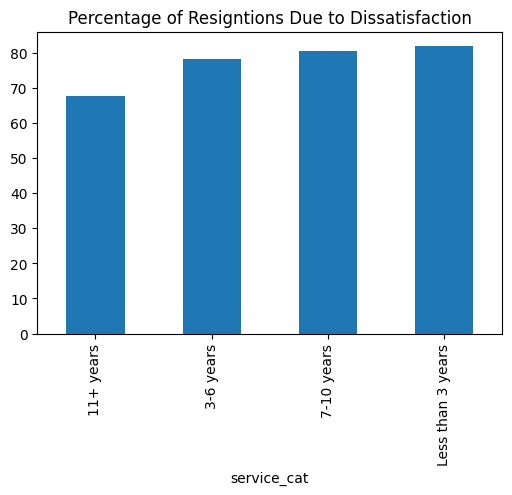

In [99]:
import matplotlib
%matplotlib inline
pivot.plot(kind='bar', title = "Percentage of Resigntions Due to Dissatisfaction", legend=False)

